# Proyek Analisis Data: Bike Sharing Dataset

*   Nama: Haiqel Aziizul Hakeem
*   Email: haiqelhakeem@gmail.com
*   ID Dicoding: Haiqel Aziizul Hakeem





## Menentukan Pertanyaan Bisnis

1. Pada musim apa penyewaan sepeda paling banyak dan kapan penyewaan paling sedikit? Apa yang dapat dilakukan untuk meningkatkan penyewaan?
2. Apa pengaruh cuaca dan hari terhadap jumlah penyewaan sepeda?

## Import Library dan Dataset

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
!pip install kaggle

In [50]:
!kaggle datasets download -d lakshmi25npathi/bike-sharing-dataset

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset
License(s): unknown
bike-sharing-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [51]:
!unzip bike-sharing-dataset.zip

Archive:  bike-sharing-dataset.zip
replace Readme.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace day.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace hour.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


## Data Wrangling

### Gathering Data

In [52]:
df = pd.read_csv('day.csv')

Pada tahap ini kita memasukkan file csv day.csv ke dalam dataframe sebagai df untuk diolah

### Assessing Data

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Setelah menggunakan

```
df.info()
```
kita mengetahui bahwa dataframe ini terdiri dari 731 baris dengan tipe data int atau float dan tidak ada null.


Informasi Tambahan:
1. instant: Index
2. dteday: Tanggal
3. season: Musim (1: semi, 2: musim panas, 3: musim gugur, 4: musim dingin)
4. yr: Tahun (0: 2011, 1: 2012)
5. mnth: Bulan (1 hingga 12)
6. hr: Jam (0 hingga 23)
7. holiday: Apakah hari tersebut hari libur atau tidak (diambil dari jadwal libur)
8. weekday: Hari dalam seminggu
9. workingday: Jika hari tersebut bukan akhir pekan atau hari libur, maka nilainya 1, jika tidak nilainya 0.
10. weathersit:
* 1: Cerah, Sedikit berawan, Sebagian berawan
* 2: Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit berawan, Kabut
* 3: Salju ringan, Hujan ringan + Petir + Awan tersebar, Hujan ringan + Awan tersebar
* 4: Hujan deras + Es + Petir + Kabut, Salju + Kabut
11. temp: Suhu yang telah dinormalisasi dalam Celsius. Nilai dibagi dengan 41 (maksimum)
12. atemp: Suhu yang dirasakan (dinormalisasi) dalam Celsius. Nilai dibagi dengan 50 (maksimum)
13. hum: Kelembaban yang telah dinormalisasi. Nilai dibagi dengan 100 (maksimum)
14. windspeed: Kecepatan angin yang telah dinormalisasi. Nilai dibagi dengan 67 (maksimum)
15. casual: Jumlah pengguna kasual
16. registered: Jumlah pengguna terdaftar
17. cnt: Total jumlah sepeda yang disewa, termasuk pengguna kasual dan terdaftar

In [54]:
# Lihat beberapa row dataset
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Berdasarkan kode

```
df.head()
```

kita mendapatkan informasi mengenai kolom apa saja yang terdapat di dalam file day.csv. Contohnya adalah pada tanggal 1 Januari 2011 tepatnya pada musim semi hari Sabtu, weekend telah tercatat jumlah sepeda yang disewakan adalah 985 buah (331 sebagai penyewa biasa dan 654 sebagai penyewa terdaftar).

### Cleaning Data

In [55]:
# Konversi dteday ke format date time
df['dteday'] = pd.to_datetime(df['dteday'])

# Mapping season sesuai dengan namanya
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
df['season'] = df['season'].map(season_map)

In [56]:
print(f"Date time:\n {df['dteday']}\n")
print(f"Season:\n {df['season']}")

Date time:
 0     2011-01-01
1     2011-01-02
2     2011-01-03
3     2011-01-04
4     2011-01-05
         ...    
726   2012-12-27
727   2012-12-28
728   2012-12-29
729   2012-12-30
730   2012-12-31
Name: dteday, Length: 731, dtype: datetime64[ns]

Season:
 0      Spring
1      Spring
2      Spring
3      Spring
4      Spring
        ...  
726    Spring
727    Spring
728    Spring
729    Spring
730    Spring
Name: season, Length: 731, dtype: object


In [57]:
# Mapping cuaca
weather_map = {
    1: 'Clear',
    2: 'Mist/Cloudy',
    3: 'Light Rain/Snow',
    4: 'Heavy Rain/Snow'
}
df['weather_label'] = df['weathersit'].map(weather_map)

In [58]:
# Mapping Hari
weekday_map = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}
df['weekday_label'] = df['weekday'].map(weekday_map)

Setelah data dibersihkan dengan konversi tipe data dan decoding class, data dapat dibaca dan diolah dengan lebih mudah.

Insights:

*   Disini kita akan menggunakan day.csv untuk mendapatkan insights berdasarkan secara garis besar.
*   Setelah memastikan tidak ada null pada data kita mengubah format dtetime menjadi date time.
*   Mengubah nama (mapping) musim dan hari dari numeric value menjadi descriptive value



## EDA (Exploratory Data Analysis)

### Explore

In [59]:
df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weather_label,weekday_label
count,731.000000,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731,731
unique,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,7
top,NaN,NaN,Fall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clear,Sunday
freq,NaN,NaN,188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,463,105
mean,366.000000,2012-01-01 00:00:00,NaN,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,NaN,NaN
min,1.000000,2011-01-01 00:00:00,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN,NaN
25%,183.500000,2011-07-02 12:00:00,NaN,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,NaN,NaN
50%,366.000000,2012-01-01 00:00:00,NaN,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,NaN,NaN
75%,548.500000,2012-07-01 12:00:00,NaN,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,NaN,NaN
max,731.000000,2012-12-31 00:00:00,NaN,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,NaN,NaN


Setelah kita menjalankan describe, kita mendapatkan beberapa informasi seperti: Jumlah baris sebanyak 731, Jumlah musim sebanyak 4 musim dengan musim gugur terbanyak yakni 188 kali muncul dalam dataset, cuaca cerah yang paling paling sering muncul yakni 463 kali, dll.

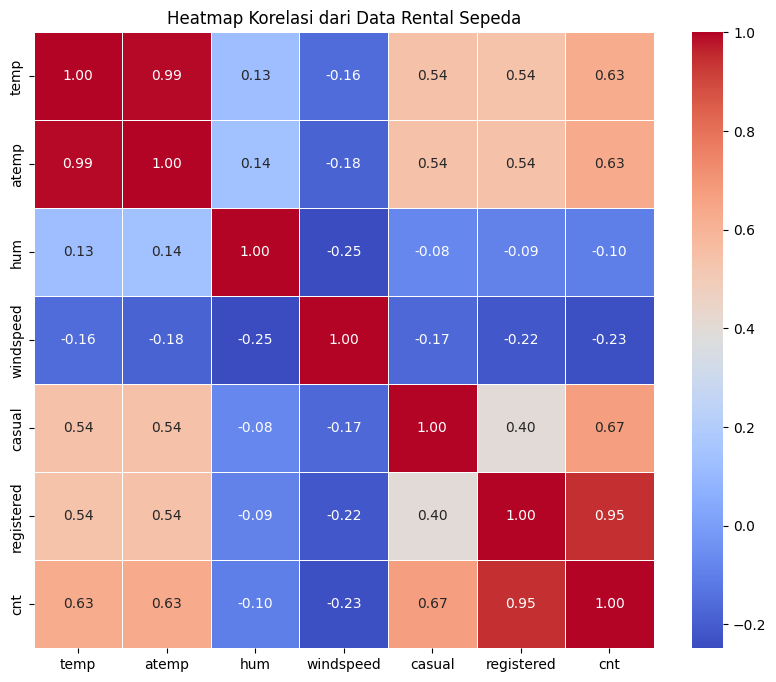

In [60]:
# Melihat korelasi tiap kolom
corr_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
corr_df = df[corr_columns]
corr_matrix = corr_df.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi dari Data Rental Sepeda')
plt.show()

Disini kita menggunakan heatmap untuk melihat seberapa terkaitnya antar kolom. Semakin mendekati nilai 1 maka semakin kuat relasi antar kolom. Disini kita dapat melihat bahwa yang paling tinggi adalah: temp dengan atemp, registered dengan count, serta casual dengan count. Akan tetapi plot ini tidak menyertakan kolom dteday, season, dan weather.

In [61]:
# Kelompokkan data berdasarkan musim dan hitung rata-rata penyewaan sepedanya
seasonal_trends = df.groupby(by='season').agg({
    'cnt': 'mean'
}).sort_values(by='cnt', ascending=False).reset_index()
print(seasonal_trends)

   season          cnt
0    Fall  5644.303191
1  Summer  4992.331522
2  Winter  4728.162921
3  Spring  2604.132597


Pada musim gugur rata-rata penywaan sebanyak 5644 penyewaan sepeda, sementara yang paling sedikit pada musim semi dengan rata-rata sebanyak 2604 penyewaan.

In [62]:
# Filter data untuk musim semi
spring_data = df[df['season'] == 'Spring']

# Mengelompokkan kondisi cuaca pada musim semi
weather_in_spring = spring_data['weather_label'].value_counts().reset_index()
weather_in_spring.columns = ['Weather Condition', 'Count']

In [63]:
# Menampilkan cuaca pada musim semi
print(f"Weather in Spring:\n {weather_in_spring}")

Weather in Spring:
   Weather Condition  Count
0             Clear    111
1       Mist/Cloudy     66
2   Light Rain/Snow      4


Dapat dilihat bahwa pada musim semi cuaca yang paling banyak adalah cerah sebanyak 111 kali.

In [73]:
weather_day_impact = df.groupby(by=['weather_label', 'weekday_label']).agg({
    'casual': 'mean',
    'registered': 'mean',
    'cnt': 'mean'
}).sort_values(by='cnt', ascending=False).reset_index()

print(weather_day_impact)

      weather_label weekday_label       casual   registered          cnt
0             Clear      Thursday   688.312500  4646.015625  5334.328125
1             Clear      Saturday   865.952381  4212.730159  5078.682540
2             Clear        Friday   685.970149  4328.955224  5014.925373
3             Clear     Wednesday   651.387097  4338.516129  4989.903226
4             Clear        Sunday  1667.358209  3308.522388  4975.880597
5             Clear       Tuesday   702.363636  3783.287879  4485.651515
6             Clear        Monday  1396.270270  2952.202703  4348.472973
7       Mist/Cloudy        Friday   444.764706  3827.147059  4271.911765
8       Mist/Cloudy       Tuesday   654.216216  3579.918919  4234.135135
9       Mist/Cloudy      Saturday   577.634146  3515.853659  4093.487805
10      Mist/Cloudy        Monday  1235.900000  2804.533333  4040.433333
11      Mist/Cloudy        Sunday  1191.323529  2819.647059  4010.970588
12      Mist/Cloudy     Wednesday   440.605263  345

Berdasarkan data tersebut kita dapat insights bahwa pada cuaca yang cerah mencapai rata-rata tertinggi sebanyak 5334 penyewaan pada hari Kamis, pada cuaca berkabut/berawan rata-rata tertinggi sebanyak 4271 pada hari Jum'at, dan pada cuaca hujan ringan/bersalju rata-rata tertinggi sebanyak 2887 pada hari Rabu.

In [76]:
# Memperbaiki urutan hari
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weather_day_impact['weekday_label'] = pd.Categorical(weather_day_impact['weekday_label'], categories=weekday_order, ordered=True)

# Sorting
weather_day_impact = weather_day_impact.sort_values('weekday_label')

Insights:

*   Setelah kita lakukan EDA, kita mendapat insight mengenai rata-rata penyewaan sepeda pada tiap musim dan rata-rata penyewaan sepeda berdasarkan pengaruh dari cuaca dan hari.
*   Penggunaan reset index karena setelah menggunakan groupby() kita ingin menjadikan kolom yang telah diolah menjadi regular columns.
*   Musim gugur memiliki tingkat penyewaan sepeda tertinggi, sementara musim semi paling sedikit
*   Musim semi memiliki cuaca yang dominan cerah dengan hanya 4 kali hujan/bersalju
*   Cuaca cerah memiliki tingkat penyewaan sepeda tertinggi, terutama pada akhir pekan.
*   Cuaca berkabut/berawan sedikit menurunkan jumlah penyewaan tetapi tidak terlalu signifikan.
*   Hujan ringan/salju secara drastis mengurangi jumlah penyewa, menunjukkan bahwa cuaca buruk sangat mempengaruhi penggunaan sepeda.

## Visualization and Explanatory Analysis

### Pertanyaan 1: Pada musim apa penyewaan sepeda paling banyak dan kapan penyewaan paling sedikit? Apa yang dapat dilakukan untuk meningkatkan penyewaan?

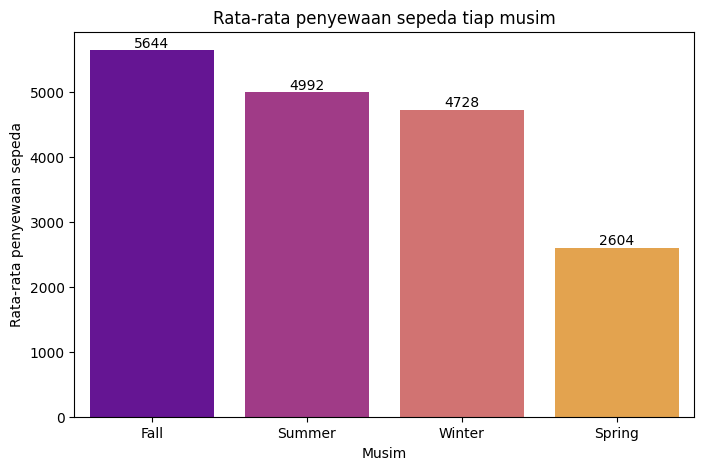

In [68]:
# Visualisasi bar Musim
plt.figure(figsize=(8, 5))
season_barplot = sns.barplot(
    x='season',
    y='cnt',
    hue='season',
    data=seasonal_trends,
    palette='plasma',
    legend=False
)

# Menambahkan nilai di atas setiap bar
for p in season_barplot.patches:
    season_barplot.annotate(
        f"{p.get_height():.0f}",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center', va='bottom', fontsize=10, color='black'
    )

plt.title('Rata-rata penyewaan sepeda tiap musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata penyewaan sepeda')
plt.show()

Berdasarkan grafik dapat ditarik kesimpulan bahwa penyewaan terbanyak adalah pada musim gugur dan paling sedikit musim semi. Mari kita telusuri cuaca di musim semi.

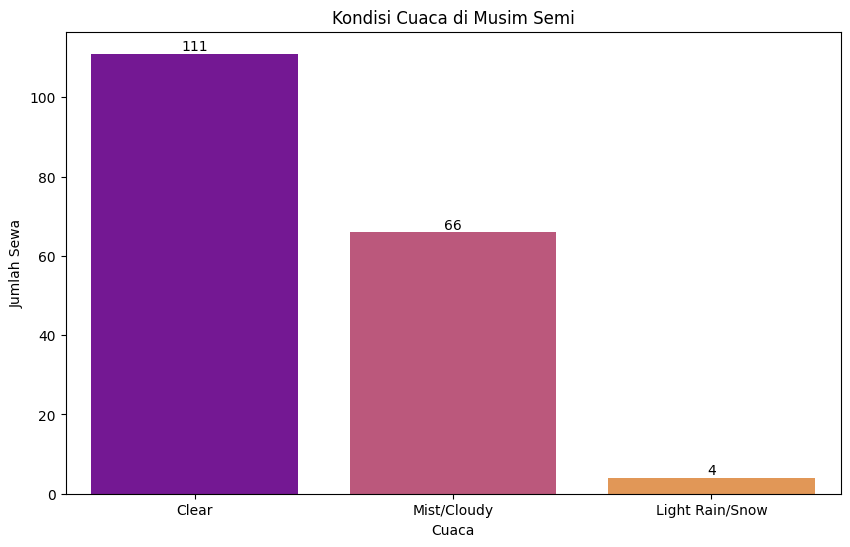

In [69]:
# Kondisi cuaca di musim semi
plt.figure(figsize=(10, 6))
spring_barplot = sns.barplot(
    x='Weather Condition',
    y='Count',
    hue='Weather Condition',
    data=weather_in_spring,
    palette='plasma',
    legend=False
)

# Menambahkan nilai di atas setiap bar
for p in spring_barplot.patches:
    spring_barplot.annotate(
        f"{p.get_height():.0f}",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center', va='bottom', fontsize=10, color='black'
    )

# Menyesuaikan tampilan
plt.title('Kondisi Cuaca di Musim Semi')
plt.xlabel('Cuaca')
plt.ylabel('Jumlah Sewa')
plt.show()


Berdasarkan data dapat dilihat bahwa cuaca di musim semi cenderung cerah. Tingkat penyewaan yang rendah pada musim semi sepertinya berdasarkan faktor eksternal yang tidak terdapat dalam dataset. Contohnya seperti: Kurangnya promosi, kebiasaan konsumen pada musim semi yang kurang beraktivitas menggunakan sepeda, dll.

### Pertanyaan 2: Apa pengaruh cuaca dan hari terhadap jumlah penyewaan sepeda?

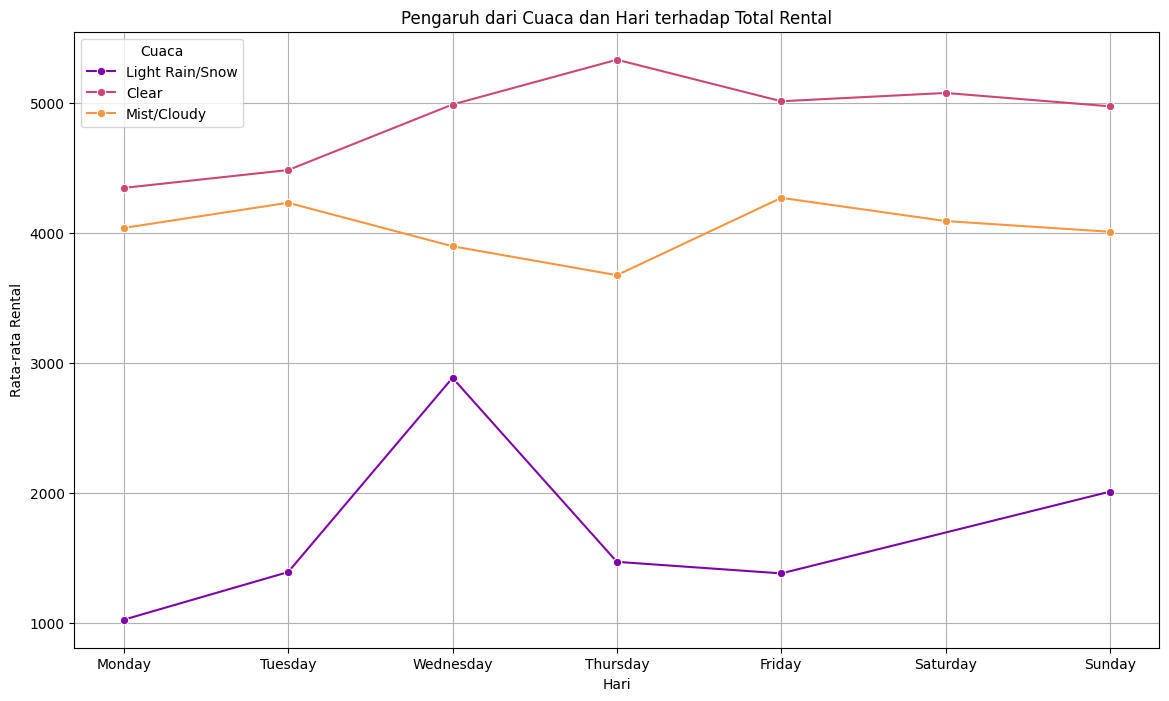

In [77]:
# Plot Pengaruh dari Cuaca dan Hari
plt.figure(figsize=(14, 8))
sns.lineplot(
    x='weekday_label',
    y='cnt',
    hue='weather_label',
    data=weather_day_impact,
    marker='o',
    palette='plasma'
)

plt.title('Pengaruh dari Cuaca dan Hari terhadap Total Rental')
plt.xlabel('Hari')
plt.ylabel('Rata-rata Rental')
plt.legend(title='Cuaca')
plt.grid(True)
plt.show()

Berdasarkan grafik dapat disimpulkan bahwa tingkat penyewaan tertinggi adalah pada hari kamis dengan cuaca cerah dan terendah pada hari senin dengan cuaca gerimis atau bersalju.

Insights:
*   Penyewaan berdasarkan musim: <br>
Musim gugur memiliki tingkat penyewaan sepeda tertinggi. Sementara itu, musim semi memiliki tingkat penyewaan terendah, meskipun cuacanya cenderung cerah. Faktor eksternal seperti kurangnya promosi atau kebiasaan masyarakat bisa menjadi penyebab rendahnya penyewaan di musim semi.

*   Pengaruh cuaca terhadap penyewaan: <br>
Cuaca cerah meningkatkan jumlah penyewaan sepeda. Cuaca hujan ringan atau bersalju menyebabkan penurunan signifikan dalam penyewaan.

*   Pengaruh hari terhadap penyewaan: <br>
Hari Kamis dengan cuaca cerah memiliki penyewaan tertinggi. Hari Senin dengan cuaca gerimis/salju memiliki penyewaan terendah. Hari kerja dan kondisi cuaca sangat memengaruhi kebiasaan penyewaan sepeda.

## Analisis Lanjutan (Opsional)

### Time Series Analysis

In [102]:
# Mengelompokkan data per hari
daily_rentals = df.groupby('dteday').agg({'cnt': 'sum'}).reset_index()

# Menghitung Rata-rata Penyewaan 7 Hari
daily_rentals['Rata-rata Penyewaan 7 Hari'] = daily_rentals['cnt'].rolling(window=7, min_periods=1).mean()

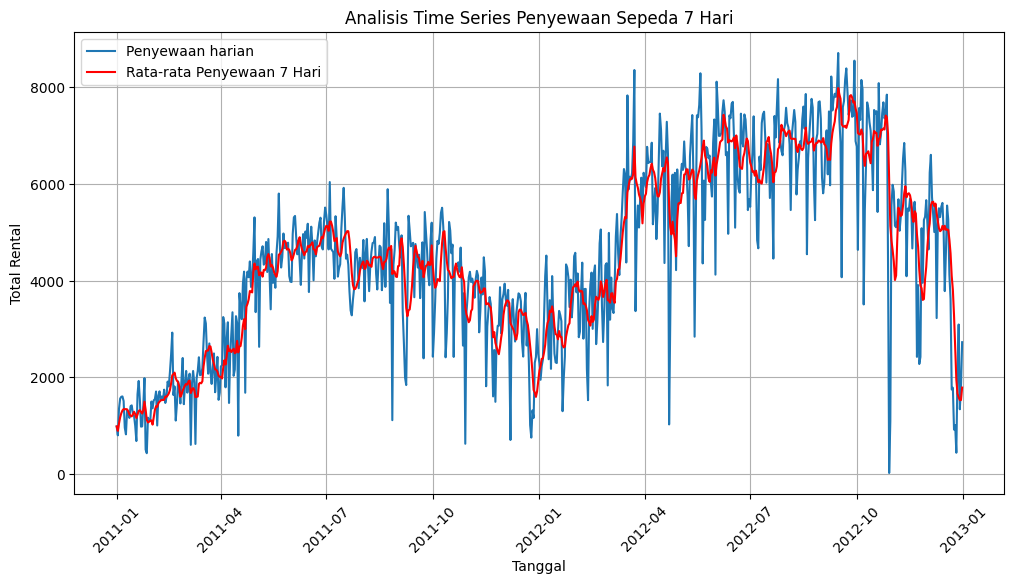

In [104]:
# Membuat Grafik Time Series dengan Rata-rata Penyewaan
plt.figure(figsize=(12, 6))
sns.lineplot(x='dteday', y='cnt', data=daily_rentals, label="Penyewaan harian")
sns.lineplot(x='dteday', y='Rata-rata Penyewaan 7 Hari', data=daily_rentals, label="Rata-rata Penyewaan 7 Hari", color="red")

plt.title("Analisis Time Series Penyewaan Sepeda 7 Hari")
plt.xlabel("Tanggal")
plt.ylabel("Total Rental")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Insights: <br>
Grafik menunjukkan tren peningkatan penyewaan sepeda dari 2011 hingga pertengahan 2012, diikuti oleh penurunan menjelang akhir 2012. Fluktuasi harian yang signifikan mengindikasikan adanya faktor eksternal seperti cuaca, musim, atau kebijakan transportasi yang memengaruhi jumlah penyewaan.

## Conclusion

1. Pada musim apa penyewaan sepeda paling banyak dan kapan penyewaan paling sedikit? Apa yang dapat dilakukan untuk meningkatkan penyewaan?
  * Puncak penyewaan sepeda paling banyak adalah pada musim gugur. Kemudian paling sedikit adalah pada musim semi. Pada musim gugur, kemungkinan cuaca dan suasana yang ditawarkan lebih menarik para pesepeda. Sedangkan pada musim semi konsumen kurang tertarik untuk menyewa sepeda. Untuk meningkatkan penyewaan ini dapat dilakukan dengan meningkatkan promosi dan marketing penyewaan, dikarenakan faktor lain seperti cuaca sudah mendukung untuk aktivitas bersepeda.

2. Apa pengaruh cuaca dan hari terhadap tingkat penyewaan sepeda?
  * Berdasarkan grafik yang diperoleh dapat disimpulkan bahwa cuaca yang cerah meningkatkan jumlah penyewa sepeda. Dapat dilihat bahwa penyewaan terbanyak adalah pada hari kamis. Meski begitu jumlah penyewa yang konstan dengan berbagai jenis cuaca adalah pada saat weekend. Sedangkan weekday, jumlah penyewa sangat bergantung cuaca.